# Decision Tree/ Random Forest Demo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility
np.random.seed(42)

# Generate circular data
n_samples = 400

X_inner = np.random.randn(n_samples // 2, 2) * 0.5
y_inner = np.zeros(n_samples // 2, dtype=int)

X_outer = np.random.randn(n_samples // 2, 2) * 1.5 + 2
y_outer = np.ones(n_samples // 2, dtype=int)

X = np.vstack((X_inner, X_outer))
y = np.hstack((y_inner, y_outer))


- Train-Test split data

In [2]:
def train_test_split(X, y, test_size=0.25):
    n = len(X)
    idxs = np.random.permutation(n)
    test_n = int(test_size * n)

    test_idxs = idxs[:test_n]
    train_idxs = idxs[test_n:]

    return X[train_idxs], X[test_idxs], y[train_idxs], y[test_idxs]


X_train, X_test, y_train, y_test = train_test_split(X, y)


## Train Random Forest

In [4]:
from ml_lib.tree.random_forest import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=25,
    max_depth=20,
    min_samples_split=5,
    n_features = 1
)

rf.fit(X_train, y_train)
preds = rf.predict(X_test)

print("preds shape:", preds.shape)
print("y_test shape:", y_test.shape)

assert preds.shape[0] == X_test.shape[0]
assert preds.shape == y_test.shape
accuracy = np.mean(preds == y_test)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


preds shape: (100,)
y_test shape: (100,)
Test Accuracy: 93.00%


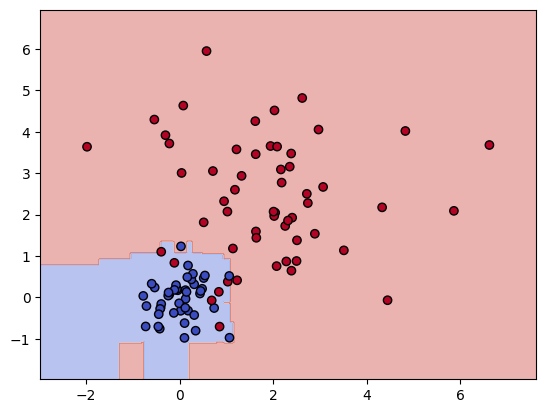

In [5]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.4, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    plt.show()


plot_decision_boundary(rf, X_test, y_test)
